In [177]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from selection_methods import *
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import json

In [11]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
data = pd.read_csv('../data/Telco-Customer-Churn-encoded-data-FE.csv')
target = pd.read_csv('../data/Telco-Customer-Churn-encoded-label.csv')

In [13]:
selection_methods_list = [
    MRMR,
    Xgb_Selection,
    GBM_Selection,
    Rf_Selection,
    Lasso_Selection,
    Catboost_Selection,
    RFE_Selection,
    PCA_Selection,
    Shap_Selection
]

In [14]:
for method in selection_methods_list:
    print(f'{method.__name__}: {method}')
    print(f"*****\n {method(data, target).used_model}\n *****")
    

MRMR: <class 'selection_methods.MRMR'>
*****
 *****
Xgb_Selection: <class 'selection_methods.Xgb_Selection'>
*****
 XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cuda', early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)
 *****
GBM_Selection: <class 'selection_methods.GBM_Selection'>
*****
 GradientBoostingClassifier()
 *****
Rf_Selection: <class

In [15]:
importances = pd.DataFrame()
for method in selection_methods_list:
    method_name = method.__name__
    print(f'Method: {method_name}')
    model = method(data, target=target)
    model.fit()
    method_importances = model.get_importances()
    print(f'Feature importances:\n {method_importances}')
    importances_dict = pd.DataFrame(method_importances, index=[method_name])
    importances = pd.concat([importances, importances_dict])
importances

Method: MRMR


100%|██████████| 43/43 [00:04<00:00, 10.44it/s]


Feature importances:
 {'Contract_Month-to-month': 44314427.42285887, 'PaymentMethod_Mailed check': 3538.278774842412, 'TechSupport_No': 1098.2150068472133, 'OnlineSecurity_No': 1031.4239749316919, 'Monthly/Total_Charges': 1020.2745567156015, 'tenure': 984.4591087152945, 'PaymentMethod_Electronic check': 900.9056822113766, 'InternetService_Fiber optic': 895.1181936528825, 'tenure_group': 785.7714099755821, 'OnlineBackup_No': 771.6821476531483, 'Contract_Two year': 704.9697418931197, 'PaperlessBilling_Yes': 606.7000899934992, 'DeviceProtection_No': 568.9817715445953, 'InternetService_No': 492.82396833483403, 'Contract_One year': 473.5511798703929, 'OnlineSecurity_No internet service': 445.06011531807553, 'SeniorCitizen_1': 429.1912422682911, 'InternetService_DSL': 423.61776080449766, 'Dependents_Yes': 414.3317161838143, 'OnlineBackup_No internet service': 406.47721999572167, 'DeviceProtection_No internet service': 381.70910964208815, 'TechSupport_Yes': 380.02961455226085, 'TechSupport_No

,Contract_Month-to-month,PaymentMethod_Mailed check,TechSupport_No,OnlineSecurity_No,Monthly/Total_Charges,tenure,PaymentMethod_Electronic check,InternetService_Fiber optic,tenure_group,OnlineBackup_No,...,StreamingMovies_No,OnlineBackup_Yes,gender_Male,DeviceProtection_Yes,StreamingMovies_Yes,StreamingTV_Yes,MultipleLines_Yes,MultipleLines_No,PhoneService_Yes,MultipleLines_No phone service
MRMR,4.431443e+07,3.538279e+03,1.098215e+03,1.031424e+03,1.020275e+03,9.844591e+02,9.009057e+02,8.951182e+02,7.857714e+02,7.716821e+02,...,2.076176e+02,9.647280e+01,75.527611,3.806085e+01,3.466231e+01,3.036130e+01,2.065448e+01,1.332565e+01,4.720153e+00,3.934136e+00
Xgb_Selection,3.334700e-01,6.196208e-03,2.277734e-02,2.464148e-02,1.467568e-02,8.393361e-03,1.149953e-02,3.236578e-01,0.000000e+00,9.512756e-03,...,1.019804e-02,8.620501e-03,0.007556,5.777318e-03,1.200656e-02,3.924814e-03,7.256907e-03,1.014480e-02,1.704112e-02,0.000000e+00
GBM_Selection,3.793475e-01,1.083612e-03,4.319286e-02,6.636738e-02,1.775662e-01,9.339429e-03,3.893921e-02,8.516243e-02,0.000000e+00,6.819661e-03,...,0.000000e+00,3.099790e-04,0.001646,4.574179e-04,4.761454e-03,1.330079e-03,2.474744e-04,8.164310e-03,2.478332e-03,4.002468e-04
Rf_Selection,4.916054e-02,9.534494e-03,2.057635e-02,2.338999e-02,1.238771e-01,8.300387e-02,2.201728e-02,2.565892e-02,3.350097e-02,1.259957e-02,...,8.357130e-03,1.007849e-02,0.021131,9.322163e-03,9.038437e-03,8.493430e-03,9.736172e-03,1.025883e-02,2.439516e-03,2.855195e-03
Lasso_Selection,0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.120989e-03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,-0.000000e+00,-0.000000,-0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-0.000000e+00,-0.000000e+00,0.000000e+00
Catboost_Selection,7.754812e+00,4.855622e-01,1.829391e+00,1.872122e+00,1.122802e+01,1.112688e+01,2.458672e+00,6.019545e+00,4.885850e+00,3.362610e-01,...,5.027208e-01,4.210084e-01,1.040730,2.758527e-02,6.993081e-01,2.271706e-01,8.237174e-01,1.288710e+00,4.180523e-01,4.796153e-01
RFE_Selection,1.000000e+00,1.000000e+00,6.000000e+00,1.000000e+00,1.100000e+01,1.900000e+01,1.000000e+00,1.000000e+00,1.300000e+01,9.000000e+00,...,1.000000e+00,8.000000e+00,18.000000,2.000000e+01,1.000000e+00,5.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00
PCA_Selection,9.148514e-33,9.148514e-33,2.550682e-08,5.022974e-08,9.148514e-33,9.148514e-33,9.148514e-33,5.677609e-08,9.148514e-33,4.300396e-08,...,9.148514e-33,4.168289e-08,0.999757,2.776109e-08,9.148514e-33,2.049738e-10,6.523863e-08,1.059217e-07,2.064476e-07,7.846455e-08
Shap_Selection,8.437142e-01,5.439763e-02,1.651233e-01,2.565397e-01,5.205219e-01,2.831978e-01,1.914869e-01,1.279191e-01,0.000000e+00,7.524099e-02,...,4.240838e-02,3.838541e-02,0.065575,1.593113e-02,6.432658e-02,4.938637e-02,3.743131e-02,1.175077e-01,3.616121e-02,0.000000e+00


In [16]:
importances.to_csv('../data/feature_importances_new.csv', index=True)

In [17]:
importances.T

,MRMR,Xgb_Selection,GBM_Selection,Rf_Selection,Lasso_Selection,Catboost_Selection,RFE_Selection,PCA_Selection,Shap_Selection
Contract_Month-to-month,4.431443e+07,0.333470,0.379348,0.049161,0.000000,7.754812,1.0,9.148514e-33,0.843714
PaymentMethod_Mailed check,3.538279e+03,0.006196,0.001084,0.009534,-0.000000,0.485562,1.0,9.148514e-33,0.054398
TechSupport_No,1.098215e+03,0.022777,0.043193,0.020576,0.000000,1.829391,6.0,2.550682e-08,0.165123
OnlineSecurity_No,1.031424e+03,0.024641,0.066367,0.023390,0.000000,1.872122,1.0,5.022974e-08,0.256540
Monthly/Total_Charges,1.020275e+03,0.014676,0.177566,0.123877,0.000000,11.228024,11.0,9.148514e-33,0.520522
tenure,9.844591e+02,0.008393,0.009339,0.083004,-0.002121,11.126880,19.0,9.148514e-33,0.283198
PaymentMethod_Electronic check,9.009057e+02,0.011500,0.038939,0.022017,0.000000,2.458672,1.0,9.148514e-33,0.191487
InternetService_Fiber optic,8.951182e+02,0.323658,0.085162,0.025659,0.000000,6.019545,1.0,5.677609e-08,0.127919
tenure_group,7.857714e+02,0.000000,0.000000,0.033501,0.000000,4.885850,13.0,9.148514e-33,0.000000
OnlineBackup_No,7.716821e+02,0.009513,0.006820,0.012600,0.000000,0.336261,9.0,4.300396e-08,0.075241


['Contract_Month-to-month', 'PaymentMethod_Mailed check', 'TechSupport_No', 'OnlineSecurity_No', 'Monthly/Total_Charges', 'tenure', 'PaymentMethod_Electronic check', 'InternetService_Fiber optic', 'tenure_group', 'OnlineBackup_No', 'Contract_Two year', 'PaperlessBilling_Yes', 'DeviceProtection_No', 'InternetService_No', 'Contract_One year', 'OnlineSecurity_No internet service', 'SeniorCitizen_1', 'InternetService_DSL', 'Dependents_Yes', 'OnlineBackup_No internet service', 'DeviceProtection_No internet service', 'TechSupport_Yes', 'TechSupport_No internet service', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Bank transfer (automatic)', 'StreamingTV_No internet service', 'Partner_Yes', 'OnlineSecurity_Yes', 'TotalCharges', 'StreamingMovies_No internet service', 'MonthlyCharges', 'TotalCharges/tenure', 'StreamingTV_No', 'StreamingMovies_No', 'OnlineBackup_Yes', 'gender_Male', 'DeviceProtection_Yes', 'StreamingMovies_Yes', 'StreamingTV_Yes', 'MultipleLines_Yes', 'MultipleLines_

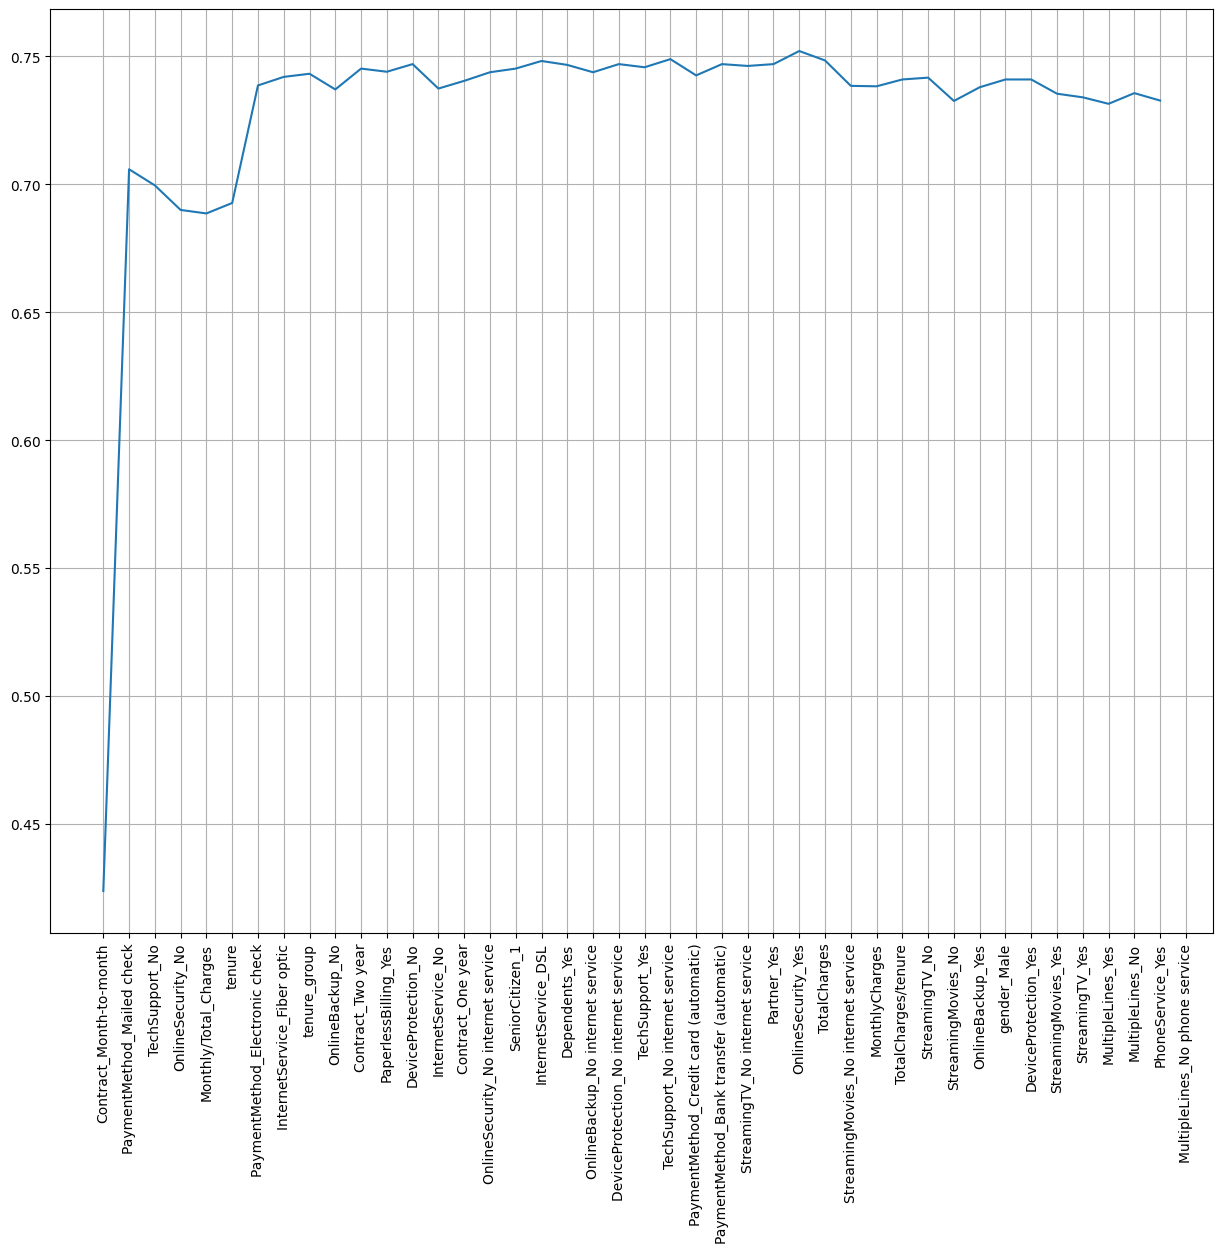

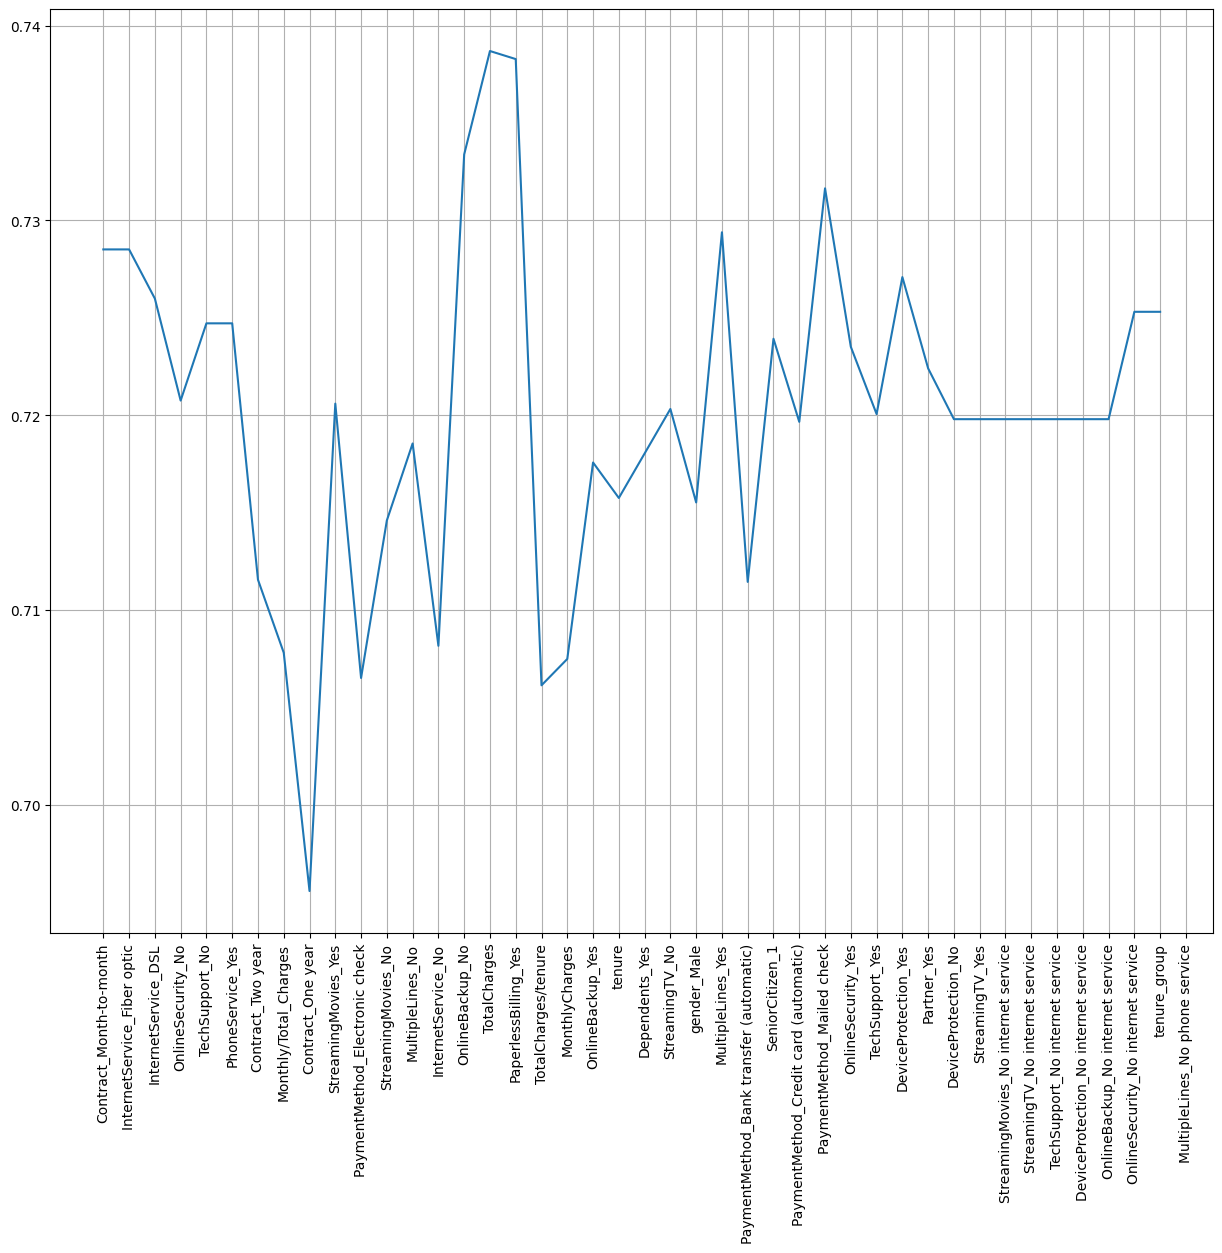

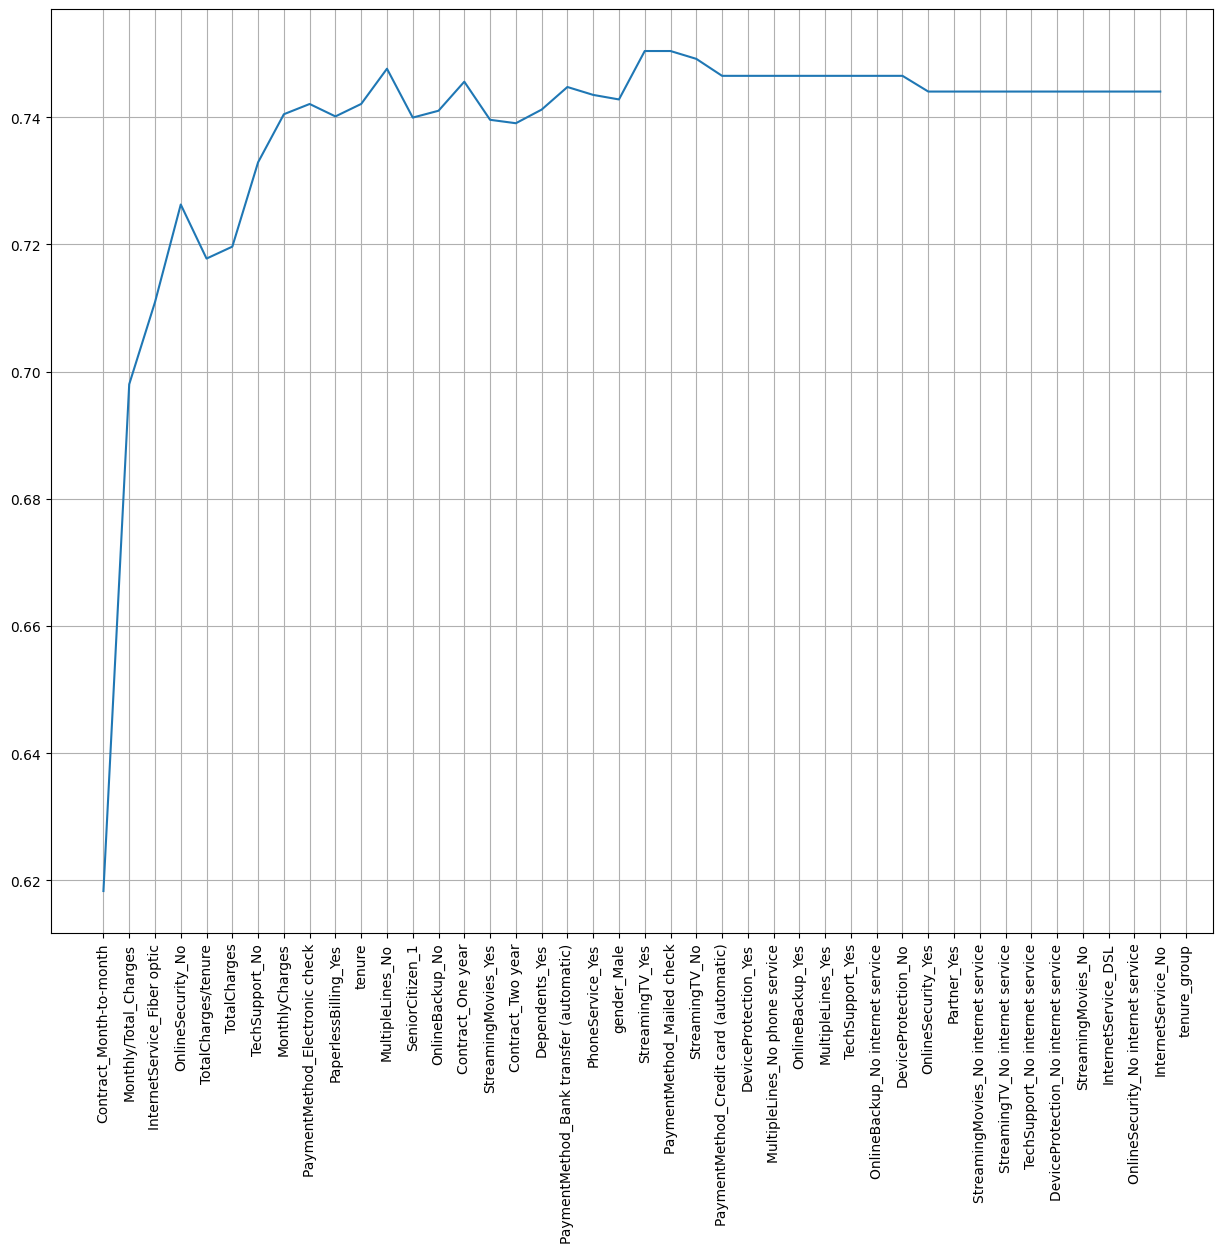

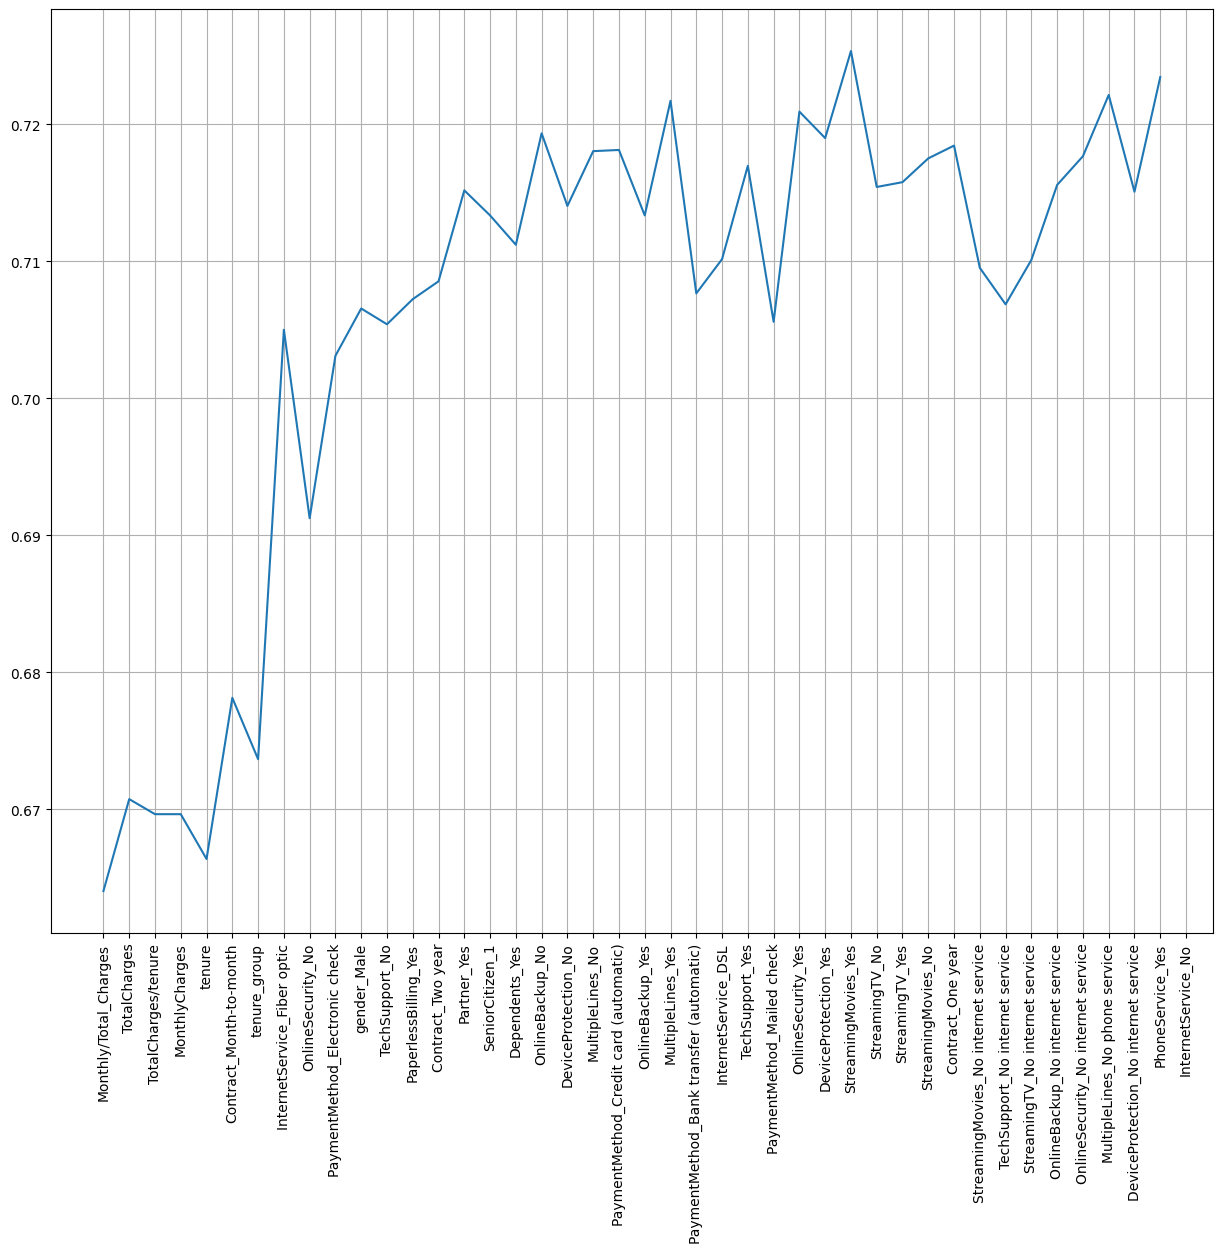

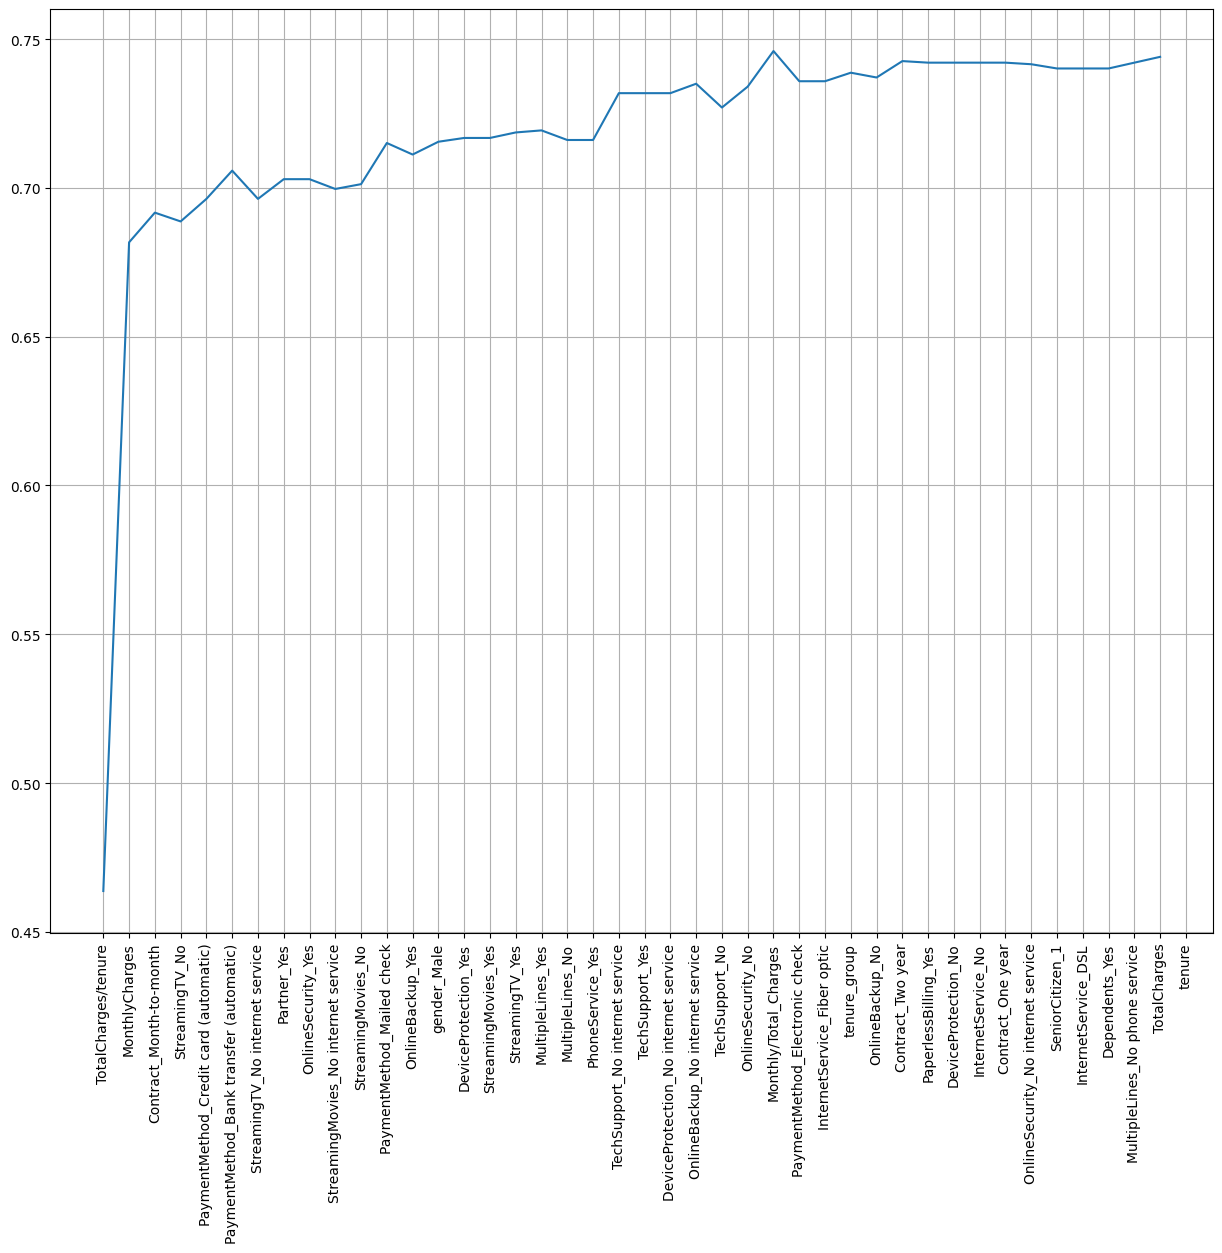

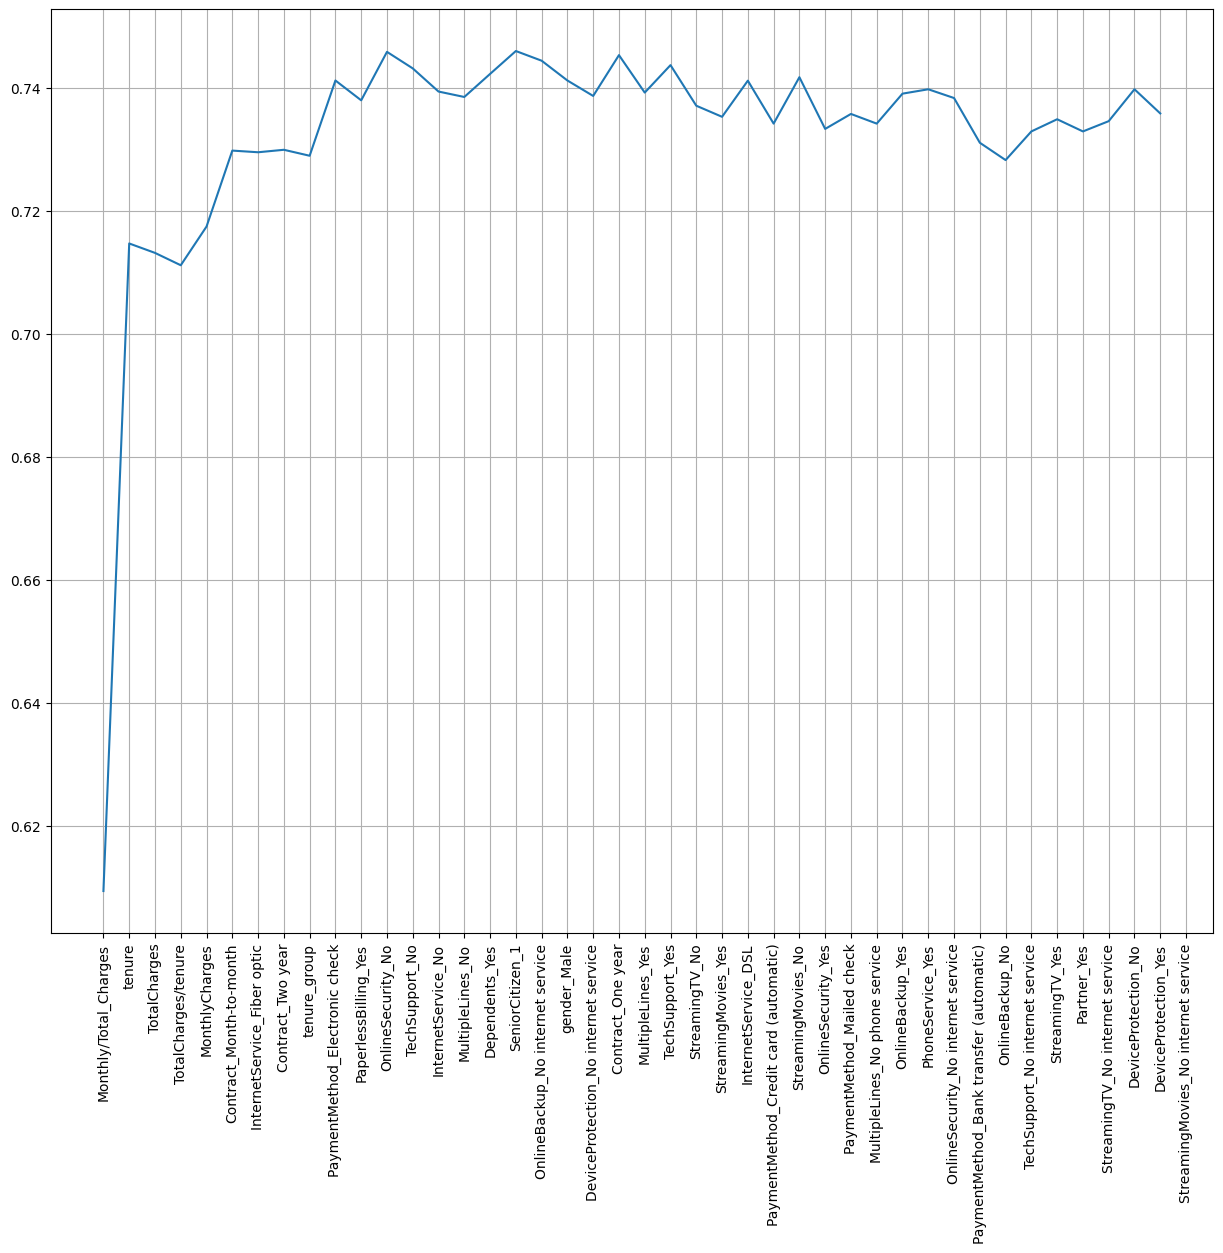

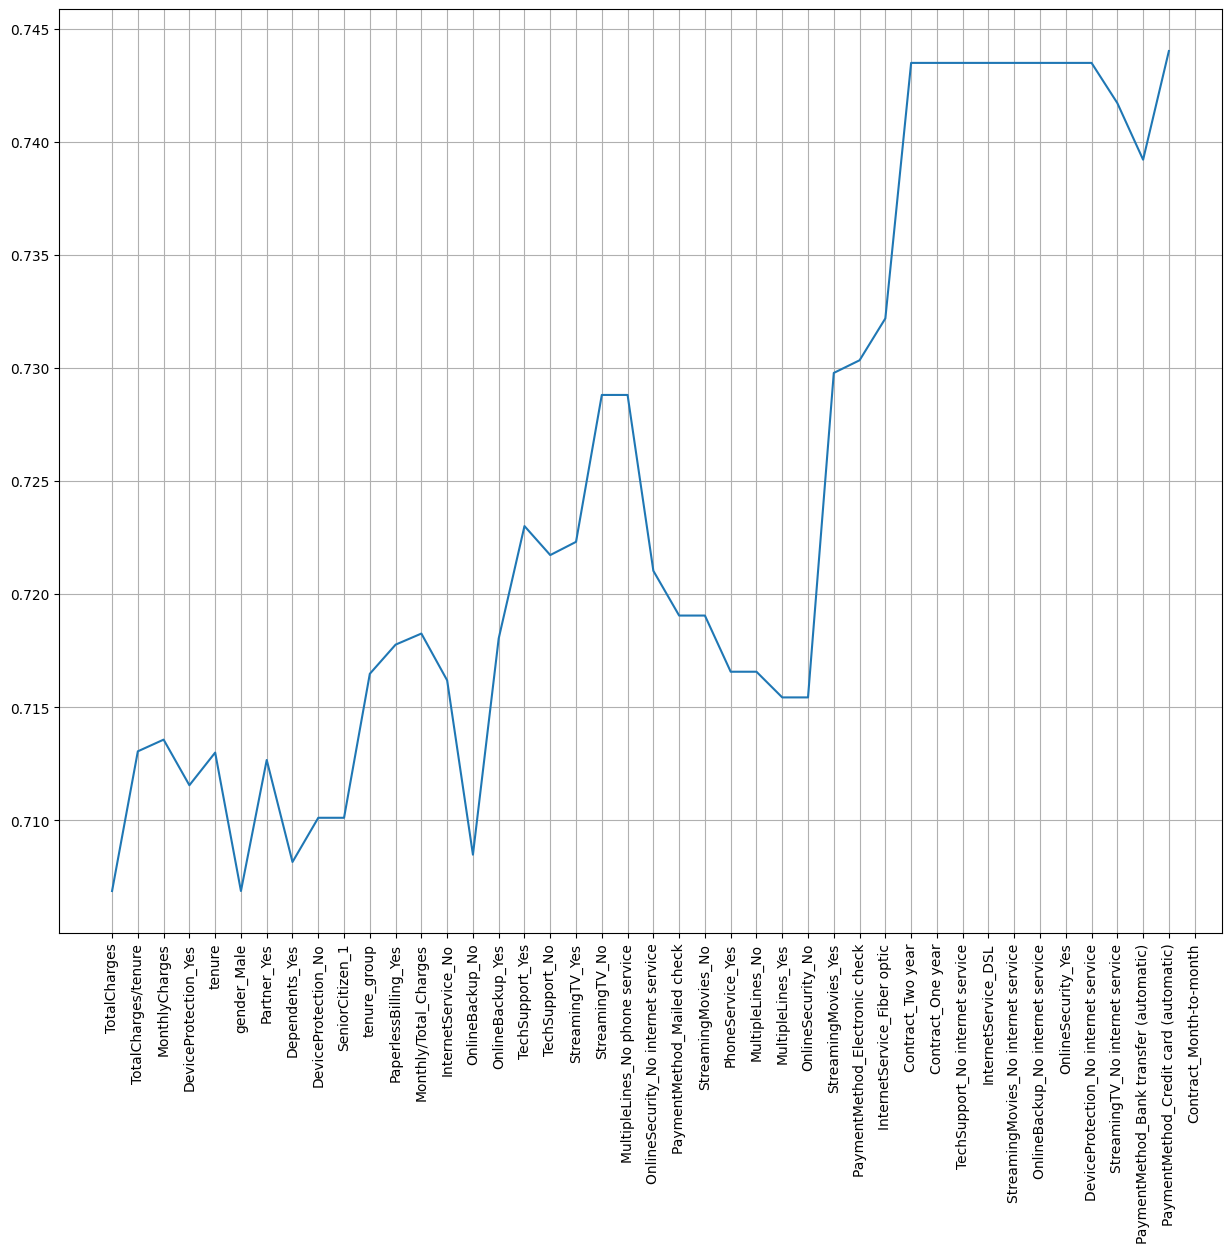

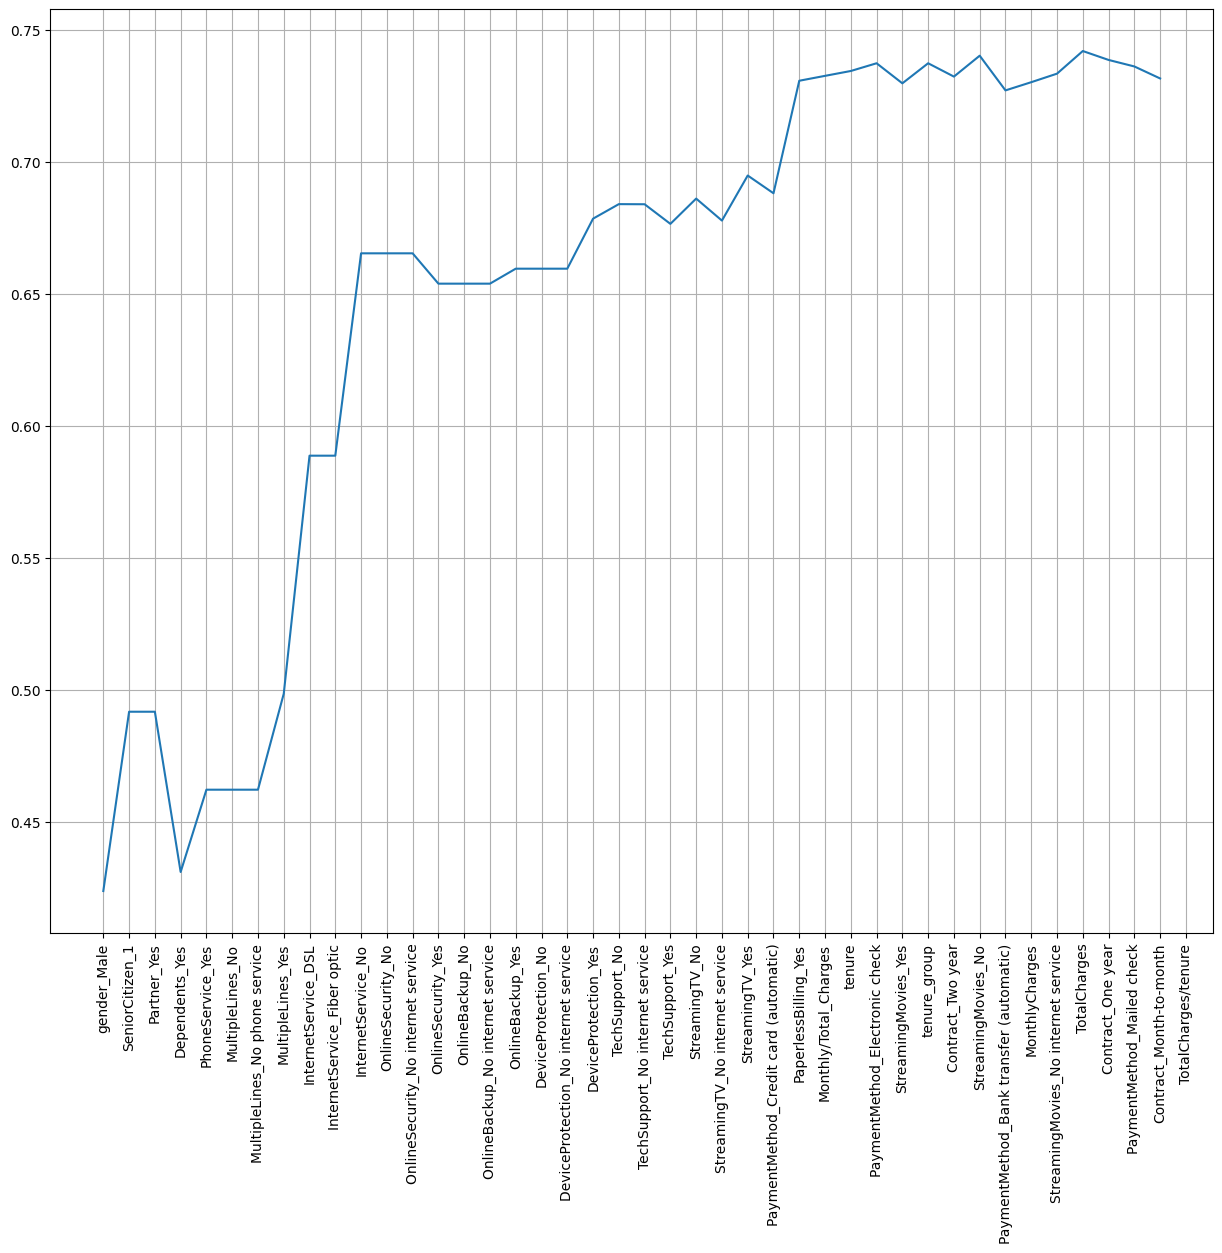

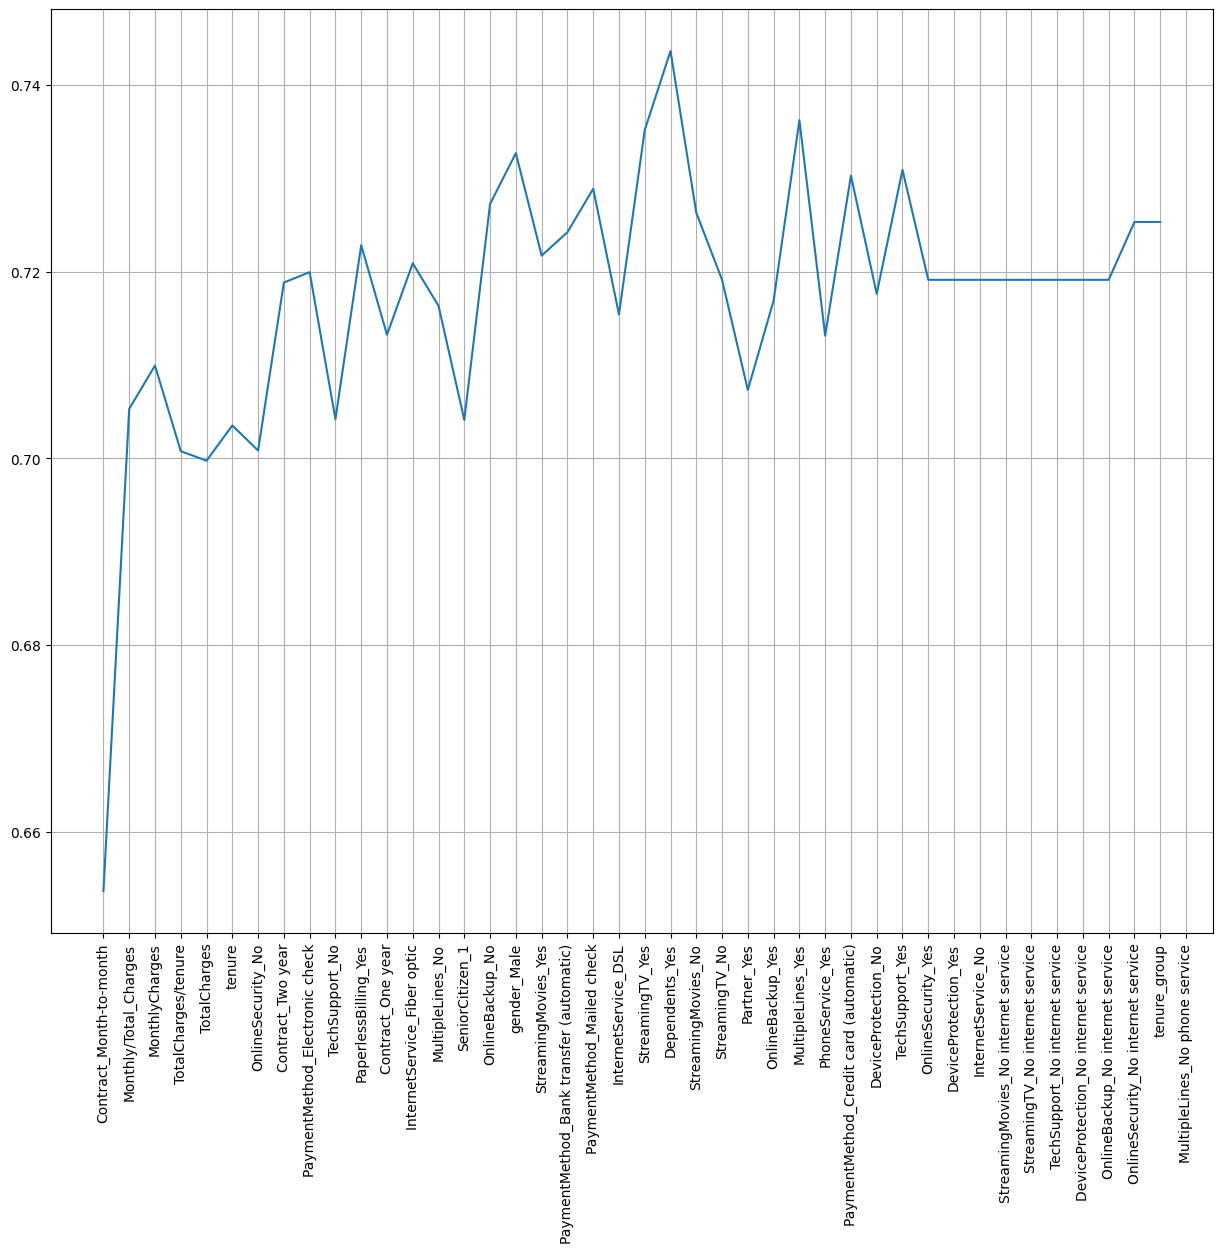

In [18]:
for method in selection_methods_list:
    accuracies = []

    features = importances.T[method.__name__]
    features = features.sort_values(ascending=False)


    X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

        
    model = method(data, target).used_model

    scores = [features.index[0]]

    for i in features.index:
        if i not in scores:
            model.fit(X_train[[*scores,i]], y_train)
            y_pred = model.predict(X_test[[*scores,i]])
            score = f1_score(y_test, y_pred, average='macro')
            accuracies.append(score)
            scores.append(i)

    print(scores, method)
    print(accuracies, 'acc')
    plt.figure(figsize=(15,12))
    plt.plot(accuracies)
    plt.xticks(ticks=range(0,43), labels=[*features.index], rotation='vertical')
    plt.grid()
    plt.savefig(f'{method.__name__}_new.png')

In [149]:
transposed = importances.T
transposed

,MRMR,Xgb_Selection,GBM_Selection,Rf_Selection,Lasso_Selection,Catboost_Selection,RFE_Selection,PCA_Selection,Shap_Selection
Contract_Month-to-month,4.431443e+07,0.333470,0.379348,0.049161,0.000000,7.754812,1.0,9.148514e-33,0.843714
PaymentMethod_Mailed check,3.538279e+03,0.006196,0.001084,0.009534,-0.000000,0.485562,1.0,9.148514e-33,0.054398
TechSupport_No,1.098215e+03,0.022777,0.043193,0.020576,0.000000,1.829391,6.0,2.550682e-08,0.165123
OnlineSecurity_No,1.031424e+03,0.024641,0.066367,0.023390,0.000000,1.872122,1.0,5.022974e-08,0.256540
Monthly/Total_Charges,1.020275e+03,0.014676,0.177566,0.123877,0.000000,11.228024,11.0,9.148514e-33,0.520522
tenure,9.844591e+02,0.008393,0.009339,0.083004,-0.002121,11.126880,19.0,9.148514e-33,0.283198
PaymentMethod_Electronic check,9.009057e+02,0.011500,0.038939,0.022017,0.000000,2.458672,1.0,9.148514e-33,0.191487
InternetService_Fiber optic,8.951182e+02,0.323658,0.085162,0.025659,0.000000,6.019545,1.0,5.677609e-08,0.127919
tenure_group,7.857714e+02,0.000000,0.000000,0.033501,0.000000,4.885850,13.0,9.148514e-33,0.000000
OnlineBackup_No,7.716821e+02,0.009513,0.006820,0.012600,0.000000,0.336261,9.0,4.300396e-08,0.075241


In [150]:
dct = {'MRMR':22, #kame 12 | 27 :TODO
       'Xgb_Selection': 15,
       'GBM_Selection': 21,
       'Rf_Selection': 29,
       'Lasso_Selection': 26,
       'Catboost_Selection': 11,
       'RFE_Selection': 31,
       'PCA_Selection': 30,
       'Shap_Selection': 22}
    

In [151]:
selections_df = transposed.copy()

In [152]:
for name, count in dct.items():
    features = transposed[name]
    features = features.sort_values(ascending=False)
    to_1 = features.iloc[:count+1].index
    selections_df[name] = 0
    selections_df[name][to_1] = 1

In [153]:
selections_df['Total'] = selections_df.sum(axis=1)
selections_df.T

,Contract_Month-to-month,PaymentMethod_Mailed check,TechSupport_No,OnlineSecurity_No,Monthly/Total_Charges,tenure,PaymentMethod_Electronic check,InternetService_Fiber optic,tenure_group,OnlineBackup_No,...,StreamingMovies_No,OnlineBackup_Yes,gender_Male,DeviceProtection_Yes,StreamingMovies_Yes,StreamingTV_Yes,MultipleLines_Yes,MultipleLines_No,PhoneService_Yes,MultipleLines_No phone service
MRMR,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
Xgb_Selection,1,0,1,1,1,0,1,1,0,1,...,1,0,0,0,1,0,0,1,1,0
GBM_Selection,1,0,1,1,1,1,1,1,0,1,...,0,0,1,0,1,1,0,1,1,0
Rf_Selection,1,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,0,1,1,0,0
Lasso_Selection,1,1,1,1,1,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
Catboost_Selection,1,0,0,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
RFE_Selection,0,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
PCA_Selection,0,0,1,1,1,1,1,1,0,1,...,0,1,1,1,0,1,1,1,1,1
Shap_Selection,1,1,1,1,1,1,1,1,0,1,...,0,0,1,0,1,1,0,1,0,0
Total,7,5,8,9,9,7,8,8,4,7,...,3,4,6,4,6,5,4,7,5,2


In [154]:
selections_df = selections_df.T
selections_df

,Contract_Month-to-month,PaymentMethod_Mailed check,TechSupport_No,OnlineSecurity_No,Monthly/Total_Charges,tenure,PaymentMethod_Electronic check,InternetService_Fiber optic,tenure_group,OnlineBackup_No,...,StreamingMovies_No,OnlineBackup_Yes,gender_Male,DeviceProtection_Yes,StreamingMovies_Yes,StreamingTV_Yes,MultipleLines_Yes,MultipleLines_No,PhoneService_Yes,MultipleLines_No phone service
MRMR,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
Xgb_Selection,1,0,1,1,1,0,1,1,0,1,...,1,0,0,0,1,0,0,1,1,0
GBM_Selection,1,0,1,1,1,1,1,1,0,1,...,0,0,1,0,1,1,0,1,1,0
Rf_Selection,1,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,0,1,1,0,0
Lasso_Selection,1,1,1,1,1,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
Catboost_Selection,1,0,0,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
RFE_Selection,0,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
PCA_Selection,0,0,1,1,1,1,1,1,0,1,...,0,1,1,1,0,1,1,1,1,1
Shap_Selection,1,1,1,1,1,1,1,1,0,1,...,0,0,1,0,1,1,0,1,0,0
Total,7,5,8,9,9,7,8,8,4,7,...,3,4,6,4,6,5,4,7,5,2


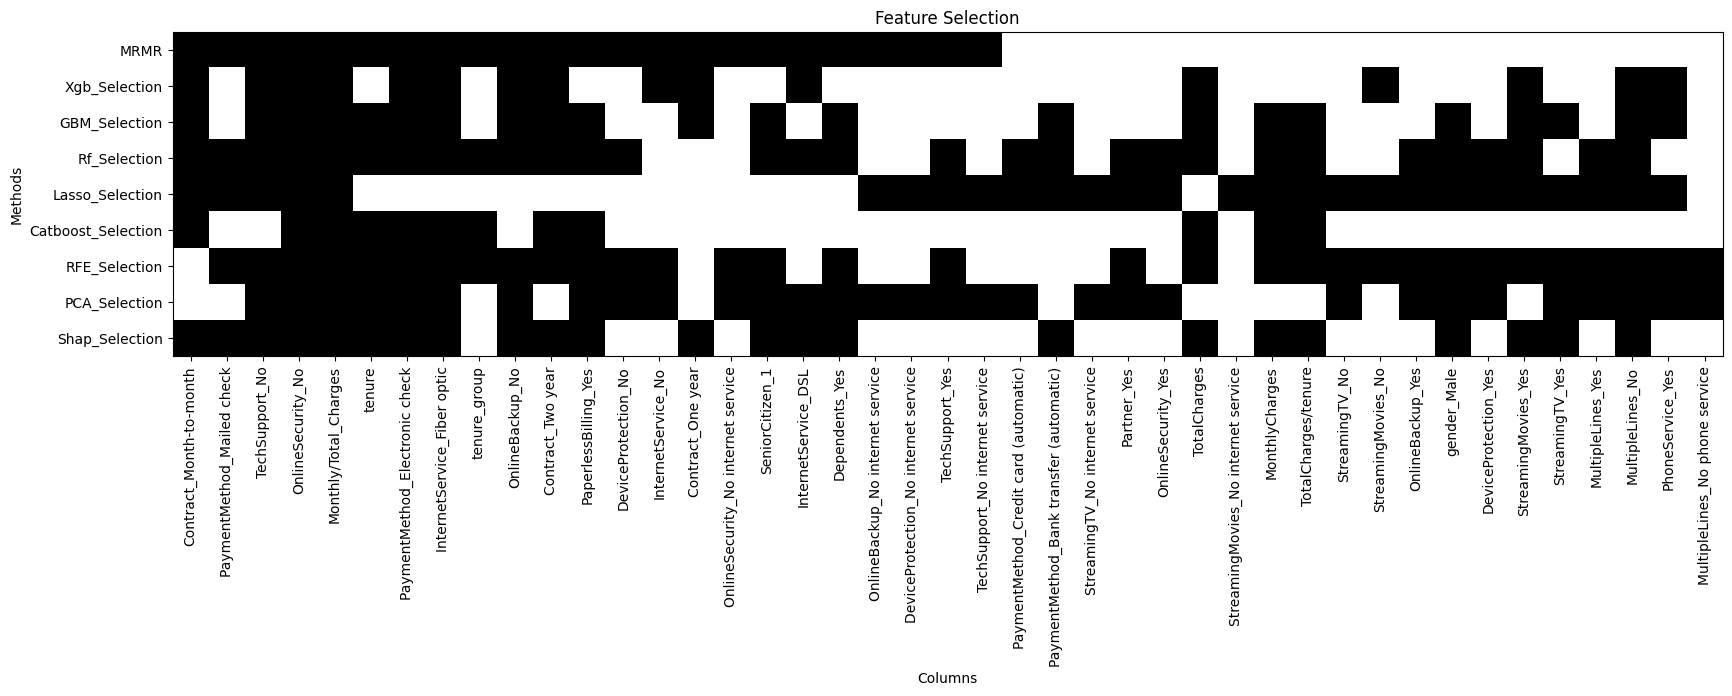

In [168]:


plt.figure(figsize=(20, 12))
plt.imshow(selections_df.to_numpy()[:-1], cmap='binary')
plt.xticks(np.arange(len(selections_df.columns)), selections_df.columns, rotation='vertical')
plt.yticks(np.arange(len(selections_df.index[:-1])), selections_df.index[:-1])
plt.xlabel('Columns')
plt.ylabel('Methods')
plt.title('Feature Selection')
plt.savefig('./feature_selection.png')

In [174]:
selected_features = selections_df.T['MRMR'][selections_df.T['MRMR'] == 1].index
selected_features

Index(['Contract_Month-to-month', 'PaymentMethod_Mailed check',
       'TechSupport_No', 'OnlineSecurity_No', 'Monthly/Total_Charges',
       'tenure', 'PaymentMethod_Electronic check',
       'InternetService_Fiber optic', 'tenure_group', 'OnlineBackup_No',
       'Contract_Two year', 'PaperlessBilling_Yes', 'DeviceProtection_No',
       'InternetService_No', 'Contract_One year',
       'OnlineSecurity_No internet service', 'SeniorCitizen_1',
       'InternetService_DSL', 'Dependents_Yes',
       'OnlineBackup_No internet service',
       'DeviceProtection_No internet service', 'TechSupport_Yes',
       'TechSupport_No internet service'],
      dtype='object')

In [176]:
data[selected_features].to_csv('../data/Telco-Customer-Churn-encoded-data-FE-Features-Selected.csv', index=False)

In [182]:
with open('./selected_features.json', 'w') as f:
    json.dump([*data[selected_features].columns], f)